## Lengths, distances, and angles

In [1]:
# the required imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
import ipywidgets
from ipywidgets import interactive

_setup some helper functions_

In [2]:
# helper functions

# compute the p-norm of 2d vector (x,y)
def getPNorm2d(p, x, y): 
    return ( np.abs(x)**p + np.abs(y)**p ) ** (1/p)

# plot the 2d array points into axes
def plot2dArray(pointsX, pointsY, axes, extent, format):
    # setup coordinate system
    axes.set_xlim(-extent, extent); axes.set_ylim(-extent, extent)
    axes.spines['right'].set_visible(False); axes.spines['top'].set_visible(False)
    axes.spines['left'].set_position('center'); axes.spines['bottom'].set_position('center')
    axes.xaxis.set_major_locator(ticker.MaxNLocator(5))
    axes.yaxis.set_major_locator(ticker.MaxNLocator(5))
    
    # draw the points
    axes.plot(pointsX, pointsY, format)

### Draw the unit circle according to $p$-norm

The unit circle in $\mathbb{R}^n$ according to the $p$-norm is
$$ B_0(1) = \big\{ x\in\mathbb{R}^n: \ \|x\|_p = 1 \big\} $$ 

In [3]:
# draw the unit circle according to p-norm
def unitCircle(p):
    samples = 100
    candX = np.linspace(-1, 1, samples); candY = np.linspace(-1, 1, samples) # candidate points
    unitPoints = [] # array of points that lie on (or near) the unit circle
    
    for i in range(samples): # decide if points are on (or near) the unit circle
        for j in range(samples):
            value = getPNorm2d(p, candX[i], candY[j])
            if (np.abs(value - 1) < 0.02): # close enough to 1
                unitPoints.append( [candX[i], candY[j]] )
    unitPoints = np.asarray(unitPoints)
    
    plt.figure(figsize=(7,7))
    plot2dArray(unitPoints[:, 0], unitPoints[:, 1], plt.axes(), 1.25, 'bo')
    plt.show()
    
iplot = interactive(unitCircle, p=ipywidgets.IntSlider(min=1, max=50, step=1, value=2, continuous_update=False))
iplot

interactive(children=(IntSlider(value=2, continuous_update=False, description='p', max=50, min=1), Output()), …

### A linear equation system

In [4]:
# helper functions again

def plot2dAffineHyperplanes(A, b, range, axes):
    x = np.arange(-range, range, 2*range/1000)
    y1 = (-A[0,0] * x + b[0]) / A[0,1]
    y2 = (-A[1,0] * x + b[1]) / A[1,1]

    plot2dArray(x, y1, axes, 10, 'b.')
    plot2dArray(x, y2, axes, 10, 'g.')


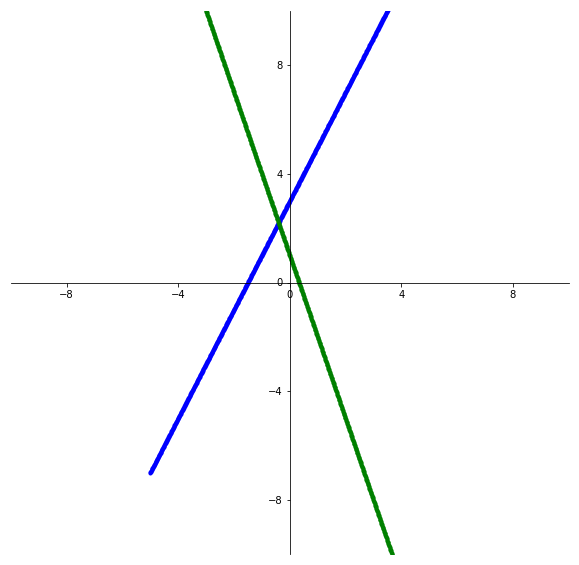

In [5]:
# define a linear system

A = np.array([ [2, -1],
               [3, 1] ])

b = np.array([-3, 1]).T

plt.figure(figsize=(10,10)); axes = plt.axes()
plot2dAffineHyperplanes(A, b, 5, axes)
plt.show()